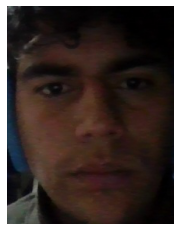

Rostro incorrecto, Cerifique su usuario
Compatibilidad con la foto del registro:  0.5
Rostro incorrecto, Cerifique su usuario
Compatibilidad con la foto del registro:  0.0
Rostro incorrecto, Cerifique su usuario
Compatibilidad con la foto del registro:  0.0


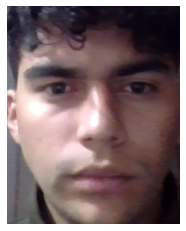

Bienvenido al sistema usuario:  fabricio2
Compatibilidad con la foto del registro:  1.0


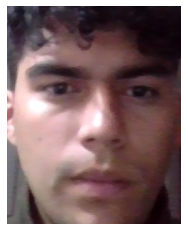

In [1]:
#--------------------------------------Importamos librerias--------------------------------------------

from tkinter import *
import os
import cv2
from matplotlib import pyplot
from mtcnn.mtcnn import MTCNN
import numpy as np

#------------------------ Crearemos una funcion que se encargara de registrar el usuario ---------------------

def registrar_usuario():
    usuario_info = usuario.get() #Obetnemos la informacion alamcenada en usuario
    contra_info = contra.get() #Obtenemos la informacion almacenada en contra

    archivo = open(usuario_info, "w") #Abriremos la informacion en modo escritura
    archivo.write(usuario_info + "\n")   #escribimos la info
    archivo.write(contra_info)
    archivo.close()

    #Limpiaremos los text variable
    usuario_entrada.delete(0, END)
    contra_entrada.delete(0, END)

    #Ahora le diremos al usuario que su registro ha sido exitoso
    Label(pantalla1, text = "Registro Convencional Exitoso", fg = "green", font = ("Calibri",11)).pack()
    

#--------------------------- Funcion para almacenar el registro facial --------------------------------------
    
def registro_facial():
    #Vamos a capturar el rostro
    cap = cv2.VideoCapture(0)               #Elegimos la camara con la que vamos a hacer la deteccion
    while(True):
        ret,frame = cap.read()              #Leemos el video
        cv2.imshow('Registro Facial',frame)         #Mostramos el video en pantalla
        if cv2.waitKey(1) == 27:            #Cuando oprimamos "Escape" rompe el video
            break
    usuario_img = usuario.get()
    cv2.imwrite(usuario_img+".jpg",frame)       #Guardamos la ultima caputra del video como imagen y asignamos el nombre del usuario
    cap.release()                               #Cerramos
    cv2.destroyAllWindows()

    usuario_entrada.delete(0, END)   #Limpiamos los text variables
    contra_entrada.delete(0, END)
    Label(pantalla1, text = "Registro Facial Exitoso", fg = "green", font = ("Calibri",11)).pack()

    #----------------- Detectamos el rostro y exportamos los pixeles --------------------------
    
    def reg_rostro(img, lista_resultados):
        data = pyplot.imread(img)
        for i in range(len(lista_resultados)):
            x1,y1,ancho, alto = lista_resultados[i]['box']
            x2,y2 = x1 + ancho, y1 + alto
            pyplot.subplot(1, len(lista_resultados), i+1)
            pyplot.axis('off')
            cara_reg = data[y1:y2, x1:x2]
            cara_reg = cv2.resize(cara_reg,(150,200), interpolation = cv2.INTER_CUBIC) #Guardamos la imagen con un tamaño de 150x200
            cv2.imwrite(usuario_img+".jpg",cara_reg)
            pyplot.imshow(data[y1:y2, x1:x2])
        pyplot.show()

    img = usuario_img+".jpg"
    pixeles = pyplot.imread(img)
    detector = MTCNN()
    caras = detector.detect_faces(pixeles)
    reg_rostro(img, caras)   
    
#------------------------Crearemos una funcion para asignar al boton registro --------------------------------
def registro():
    global usuario
    global contra  #Globalizamos las variables para usarlas en otras funciones
    global usuario_entrada
    global contra_entrada
    global pantalla1
    pantalla1 = Toplevel(pantalla) #Esta pantalla es de un nivel superior a la principal
    pantalla1.title("Registro")
    pantalla1.geometry("300x250")  #Asignamos el tamaño de la ventana
    
    #--------- Empezaremos a crear las entradas ----------------------------------------
    
    usuario = StringVar()
    contra = StringVar()
    
    Label(pantalla1, text = "Registro facial: debe de asignar un usuario:").pack()
    #Label(pantalla1, text = "").pack()  #Dejamos un poco de espacio
    Label(pantalla1, text = "Registro tradicional: debe asignar usuario y contraseña:").pack()
    Label(pantalla1, text = "").pack()  #Dejamos un poco de espacio
    Label(pantalla1, text = "Usuario * ").pack()  #Mostramos en la pantalla 1 el usuario
    usuario_entrada = Entry(pantalla1, textvariable = usuario) #Creamos un text variable para que el usuario ingrese la info
    usuario_entrada.pack()
    Label(pantalla1, text = "Contraseña * ").pack()  #Mostramos en la pantalla 1 la contraseña
    contra_entrada = Entry(pantalla1, textvariable = contra) #Creamos un text variable para que el usuario ingrese la contra
    contra_entrada.pack()
    Label(pantalla1, text = "").pack()  #Dejamos un espacio para la creacion del boton
    Button(pantalla1, text = "Registro Tradicional", width = 15, height = 1, command = registrar_usuario).pack()  #Creamos el boton

    #------------ Vamos a crear el boton para hacer el registro facial --------------------
    Label(pantalla1, text = "").pack()
    Button(pantalla1, text = "Registro Facial", width = 15, height = 1, command = registro_facial).pack()

#------------------------------------------- Funcion para verificar los datos ingresados al login ------------------------------------
    
def verificacion_login():
    log_usuario = verificacion_usuario.get()
    log_contra = verificacion_contra.get()

    usuario_entrada2.delete(0, END)
    contra_entrada2.delete(0, END)

    lista_archivos = os.listdir()   #Vamos a importar la lista de archivos con la libreria os
    if log_usuario in lista_archivos:   #Comparamos los archivos con el que nos interesa
        archivo2 = open(log_usuario, "r")  #Abrimos el archivo en modo lectura
        verificacion = archivo2.read().splitlines()  #leera las lineas dentro del archivo ignorando el resto
        if log_contra in verificacion:
            print("Inicio de sesion exitoso")
            Label(pantalla2, text = "Inicio de Sesion Exitoso", fg = "green", font = ("Calibri",11)).pack()
        else:
            print("Contraseña incorrecta, ingrese de nuevo")
            Label(pantalla2, text = "Contraseña Incorrecta", fg = "red", font = ("Calibri",11)).pack()
    else:
        print("Usuario no encontrado")
        Label(pantalla2, text = "Usuario no encontrado", fg = "red", font = ("Calibri",11)).pack()
    
#--------------------------Funcion para el Login Facial --------------------------------------------------------
def login_facial():
#------------------------------Vamos a capturar el rostro-----------------------------------------------------
    cap = cv2.VideoCapture(0)               #Elegimos la camara con la que vamos a hacer la deteccion
    while(True):
        ret,frame = cap.read()              #Leemos el video
        cv2.imshow('Login Facial',frame)         #Mostramos el video en pantalla
        if cv2.waitKey(1) == 27:            #Cuando oprimamos "Escape" rompe el video
            break
    usuario_login = verificacion_usuario.get()    #Con esta variable vamos a guardar la foto pero con otro nombre para no sobreescribir
    cv2.imwrite(usuario_login+"LOG.jpg",frame)       #Guardamos la ultima caputra del video como imagen y asignamos el nombre del usuario
    cap.release()                               #Cerramos
    cv2.destroyAllWindows()

    usuario_entrada2.delete(0, END)   #Limpiamos los text variables
    contra_entrada2.delete(0, END)

    #----------------- Funcion para guardar el rostro --------------------------
    
    def log_rostro(img, lista_resultados):
        data = pyplot.imread(img)
        for i in range(len(lista_resultados)):
            x1,y1,ancho, alto = lista_resultados[i]['box']
            x2,y2 = x1 + ancho, y1 + alto
            pyplot.subplot(1, len(lista_resultados), i+1)
            pyplot.axis('off')
            cara_reg = data[y1:y2, x1:x2]
            cara_reg = cv2.resize(cara_reg,(150,200), interpolation = cv2.INTER_CUBIC) #Guardamos la imagen 150x200
            cv2.imwrite(usuario_login+"LOG.jpg",cara_reg)
            return pyplot.imshow(data[y1:y2, x1:x2])
        pyplot.show()

    #-------------------------- Detectamos el rostro-------------------------------------------------------
    
    img = usuario_login+"LOG.jpg"
    pixeles = pyplot.imread(img)
    detector = MTCNN()
    caras = detector.detect_faces(pixeles)
    log_rostro(img, caras)

    #-------------------------- Funcion para comparar los rostros --------------------------------------------
    def orb_sim(img1,img2):
        orb = cv2.ORB_create()  #Creamos el objeto de comparacion
 
        kpa, descr_a = orb.detectAndCompute(img1, None)  #Creamos descriptor 1 y extraemos puntos claves
        kpb, descr_b = orb.detectAndCompute(img2, None)  #Creamos descriptor 2 y extraemos puntos claves

        comp = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True) #Creamos comparador de fuerza

        matches = comp.match(descr_a, descr_b)  #Aplicamos el comparador a los descriptores

        regiones_similares = [i for i in matches if i.distance < 70] #Extraemos las regiones similares en base a los puntos claves
        if len(matches) == 0:
            return 0
        return len(regiones_similares)/len(matches)  #Exportamos el porcentaje de similitud
        
    #---------------------------- Importamos las imagenes y llamamos la funcion de comparacion ---------------------------------
    
    im_archivos = os.listdir()   #Vamos a importar la lista de archivos con la libreria os
    if usuario_login+".jpg" in im_archivos:   #Comparamos los archivos con el que nos interesa
        rostro_reg = cv2.imread(usuario_login+".jpg",0)     #Importamos el rostro del registro
        rostro_log = cv2.imread(usuario_login+"LOG.jpg",0)  #Importamos el rostro del inicio de sesion
        similitud = orb_sim(rostro_reg, rostro_log)
        if similitud >= 0.98:
            Label(pantalla2, text = "Inicio de Sesion Exitoso", fg = "green", font = ("Calibri",11)).pack()
            print("Bienvenido al sistema usuario: ",usuario_login)
            print("Compatibilidad con la foto del registro: ",similitud)
        else:
            print("Rostro incorrecto, Cerifique su usuario")
            print("Compatibilidad con la foto del registro: ",similitud)
            Label(pantalla2, text = "Incompatibilidad de rostros", fg = "red", font = ("Calibri",11)).pack()
    else:
        print("Usuario no encontrado")
        Label(pantalla2, text = "Usuario no encontrado", fg = "red", font = ("Calibri",11)).pack()
            

#------------------------Funcion que asignaremos al boton login -------------------------------------------------
        
def login():
    global pantalla2
    global verificacion_usuario
    global verificacion_contra
    global usuario_entrada2
    global contra_entrada2
    
    pantalla2 = Toplevel(pantalla)
    pantalla2.title("Login")
    pantalla2.geometry("300x250")   #Creamos la ventana
    Label(pantalla2, text = "Login facial: debe de asignar un usuario:").pack()
    Label(pantalla2, text = "Login tradicional: debe asignar usuario y contraseña:").pack()
    Label(pantalla2, text = "").pack()  #Dejamos un poco de espacio
    
    verificacion_usuario = StringVar()
    verificacion_contra = StringVar()
    
    #---------------------------------- Ingresamos los datos --------------------------
    Label(pantalla2, text = "Usuario * ").pack()
    usuario_entrada2 = Entry(pantalla2, textvariable = verificacion_usuario)
    usuario_entrada2.pack()
    Label(pantalla2, text = "Contraseña * ").pack()
    contra_entrada2 = Entry(pantalla2, textvariable = verificacion_contra)
    contra_entrada2.pack()
    Label(pantalla2, text = "").pack()
    Button(pantalla2, text = "Inicio de Sesion Tradicional", width = 20, height = 1, command = verificacion_login).pack()

    #------------ Vamos a crear el boton para hacer el login facial --------------------
    Label(pantalla2, text = "").pack()
    Button(pantalla2, text = "Inicio de Sesion Facial", width = 20, height = 1, command = login_facial).pack()
        
#------------------------- Funcion de nuestra pantalla principal ------------------------------------------------
    
def pantalla_principal():
    global pantalla          #Globalizamos la variable para usarla en otras funciones
    pantalla = Tk()
    pantalla.geometry("300x250")  #Asignamos el tamaño de la ventana 
    pantalla.title("Aprende e Ingenia")       #Asignamos el titulo de la pantalla
    Label(text = "Login Inteligente", bg = "gray", width = "300", height = "2", font = ("Verdana", 13)).pack() #Asignamos caracteristicas de la ventana
    
#------------------------- Vamos a Crear los Botones ------------------------------------------------------
    
    Label(text = "").pack()  #Creamos el espacio entre el titulo y el primer boton
    Button(text = "Iniciar Sesion", height = "2", width = "30", command = login).pack()
    Label(text = "").pack() #Creamos el espacio entre el primer boton y el segundo boton
    Button(text = "Registro", height = "2", width = "30", command = registro).pack()

    pantalla.mainloop()

pantalla_principal()

In [4]:
pip install tensorflow==2.5.0 --ignore-installed --user


  Using cached tensorflow-2.5.0-cp39-cp39-win_amd64.whl (422.6 MB)
  Using cached wheel-0.40.0-py3-none-any.whl (64 kB)
  Using cached tensorboard-2.13.0-py3-none-any.whl (5.6 MB)Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



  Using cached numpy-1.19.5-cp39-cp39-win_amd64.whl (13.3 MB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
  Using cached absl_py-0.15.0-py3-none-any.whl (132 kB)
  Using cached keras_nightly-2.5.0.dev2021032900-py2.py3-none-any.whl (1.2 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached six-1.15.0-py2.py3-none-any.whl (10 kB)
  Using cached tensorflow_estimator-2.5.0-py2.py3-none-any.whl (462 kB)
  Using cached wrapt-1.12.1-py3-none-any.whl
  Using cached grpcio-1.34.1-cp39-cp39-win_amd64.whl (2.9 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached h5py-3.1.0-cp39-cp39-win_amd64.whl (2.7 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached protobuf-4.23.2-cp39-cp39-win_amd64.whl (422 kB)
  Using cached google_pasta-0.

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.1.5 requires pyqt5<5.13, which is not installed.
spyder 5.1.5 requires pyqtwebengine<5.13, which is not installed.
daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.
conda-repo-cli 1.0.4 requires pathlib, which is not ins


  Using cached urllib3-1.26.16-py2.py3-none-any.whl (143 kB)
  Using cached pyasn1_modules-0.3.0-py2.py3-none-any.whl (181 kB)
  Using cached rsa-4.9-py3-none-any.whl (34 kB)
  Using cached cachetools-5.3.1-py3-none-any.whl (9.3 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
  Using cached importlib_metadata-6.6.0-py3-none-any.whl (22 kB)
  Using cached zipp-3.15.0-py3-none-any.whl (6.8 kB)
  Using cached pyasn1-0.5.0-py2.py3-none-any.whl (83 kB)
  Using cached idna-3.4-py3-none-any.whl (61 kB)
  Using cached charset_normalizer-3.1.0-cp39-cp39-win_amd64.whl (97 kB)
  Using cached certifi-2023.5.7-py3-none-any.whl (156 kB)
  Using cached oauthlib-3.2.2-py3-none-any.whl (151 kB)
  Using cached MarkupSafe-2.1.3-cp39-cp39-win_amd64.whl (17 kB)


In [7]:
 pip show tensorflow

Name: tensorflow
Version: 2.5.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\fabri\appdata\roaming\python\python39\site-packages
Requires: termcolor, wheel, tensorboard, keras-preprocessing, wrapt, protobuf, keras-nightly, astunparse, gast, opt-einsum, grpcio, flatbuffers, six, numpy, google-pasta, tensorflow-estimator, h5py, typing-extensions, absl-py
Required-by: 
Note: you may need to restart the kernel to use updated packages.
